In [184]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse
from nsepy import get_history
import mplfinance as mpf

In [185]:
nifty50=pd.read_csv('NIFTY50.csv')

In [186]:
symbol=nifty50[['SYMBOL']]
nifty50.columns


Index(['SYMBOL'], dtype='object')

In [257]:
# Get historical data of all Nifty50 stocks and filter out rising stocks
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe
list=[]
for name, values in nifty50.iteritems():
    for index in values:
        rising_stock=get_history(index,start=datetime(2021,1,1),end=datetime(2021,12,20))
        sublist=[]
        if rising_stock['Open'][-1] < rising_stock['Close'][-1]:
            short_window = 44
            rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=short_window).mean()
            sublist.append(index)
            sublist.append(rising_stock["Open"][-1])
            sublist.append(rising_stock["High"][-1])
            sublist.append(rising_stock["Low"][-1])
            sublist.append(rising_stock["Close"][-1])
            sublist.append(rising_stock["44_obs_for_SMA"][-1])
            
            list.append(sublist)
            rising_stock.index.name = 'Date'
            
            rising_stock.to_csv("stocks/{index}.csv".format(index=index))
            print(index)
            
    #print('{name}: {value}'.format(name=name, value=values))


RELIANCE
ADANIPORTS
GRASIM
M&M
COALINDIA
HDFCBANK
HDFC
INDUSINDBK
KOTAKBANK
EICHERMOT
DIVISLAB
BHARTIARTL
ITC
HDFCLIFE
TATACONSUM
TECHM
BRITANNIA
HCLTECH


In [258]:
data=pd.DataFrame(list,columns=["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"])
data=data[["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"]]
data.to_csv("stocks/rising_stocks.csv")

In [259]:
rising_stocks=pd.read_csv('stocks/rising_stocks.csv',index_col=0)

In [260]:
rising_stocks.columns

Index(['SYMBOL', 'Open', 'High', 'Low', 'Close', '44_obs_for_SMA'], dtype='object')

In [261]:
rising_stocks

,SYMBOL,Open,High,Low,Close,44_obs_for_SMA
0,RELIANCE,1990.00,2105.00,1990.00,2094.80,1970.657955
1,ADANIPORTS,755.00,784.90,754.00,776.15,751.317045
2,GRASIM,1428.20,1480.00,1421.00,1465.45,1393.093182
3,M&M,829.00,853.00,810.50,845.85,788.947727
4,COALINDIA,145.60,148.80,144.75,146.90,135.744318
5,HDFCBANK,1490.90,1513.00,1478.75,1503.45,1443.615909
6,HDFC,2514.65,2549.85,2511.00,2541.35,2490.746591
7,INDUSINDBK,1014.50,1025.50,1003.00,1019.35,931.965909
8,KOTAKBANK,1786.00,1813.00,1778.25,1800.75,1760.886364
9,EICHERMOT,2630.00,2710.00,2626.10,2638.45,2495.885227


In [275]:
### and plot the graph with points where upturn happen

for index, row in rising_stocks.iterrows():
    if round(row["Close"],1)> round(row["44_obs_for_SMA"],1) and round(row["44_obs_for_SMA"],1)>= round(row["Open"],1):
        #print(row["SYMBOL"])
        print("{symbol} {high} {sma}  {low} ".format(symbol=row["SYMBOL"],high=row["High"],low=row["Low"],sma=row["44_obs_for_SMA"]))

TATACONSUM 657.7 653.406818181818  646.3 


In [276]:
#rising_stock.dtypes

In [264]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

RELIANCE


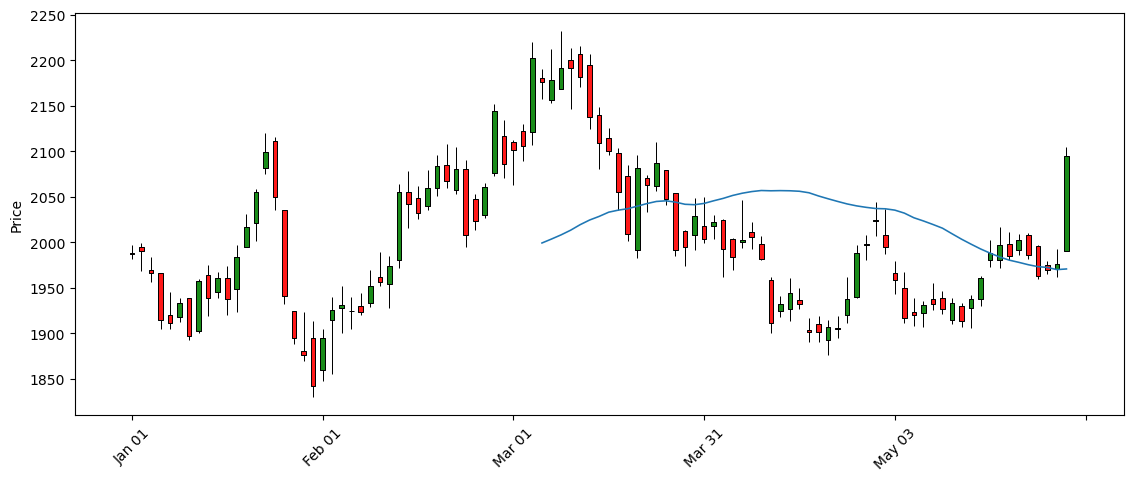

ADANIPORTS


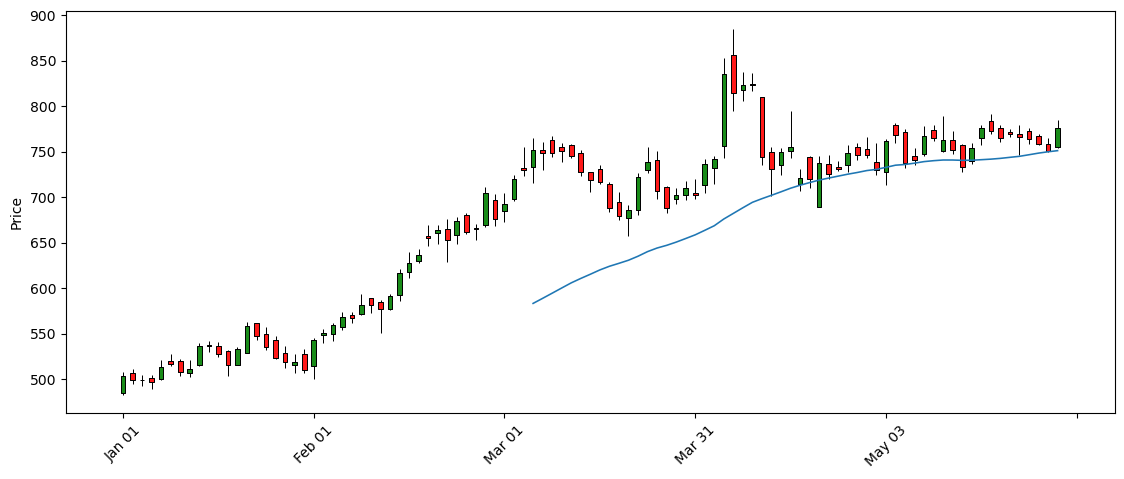

GRASIM


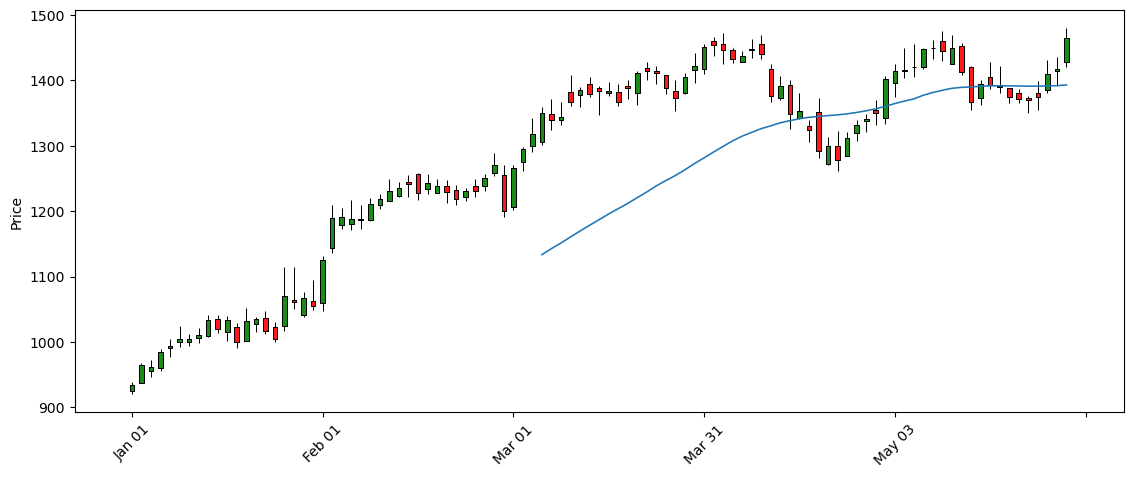

M&M


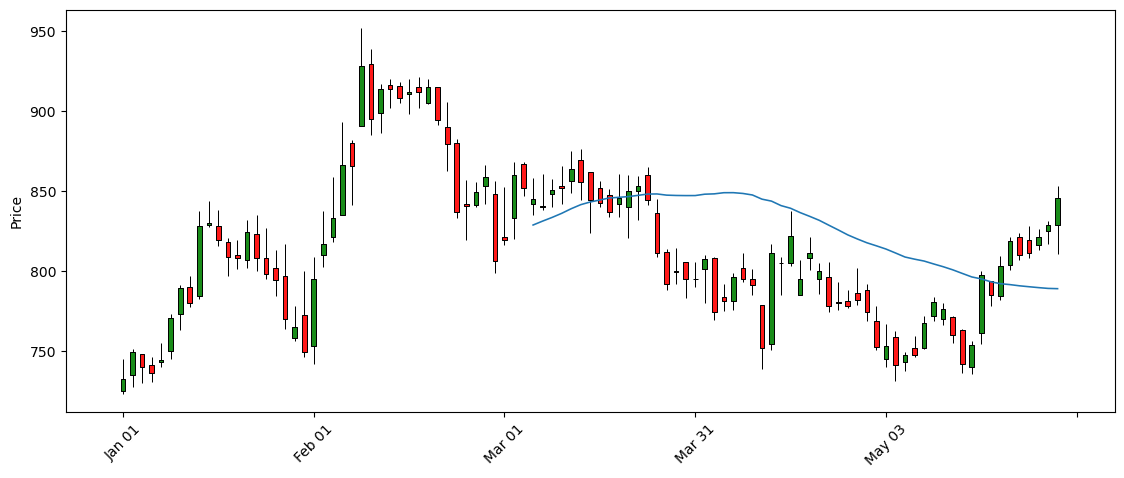

COALINDIA


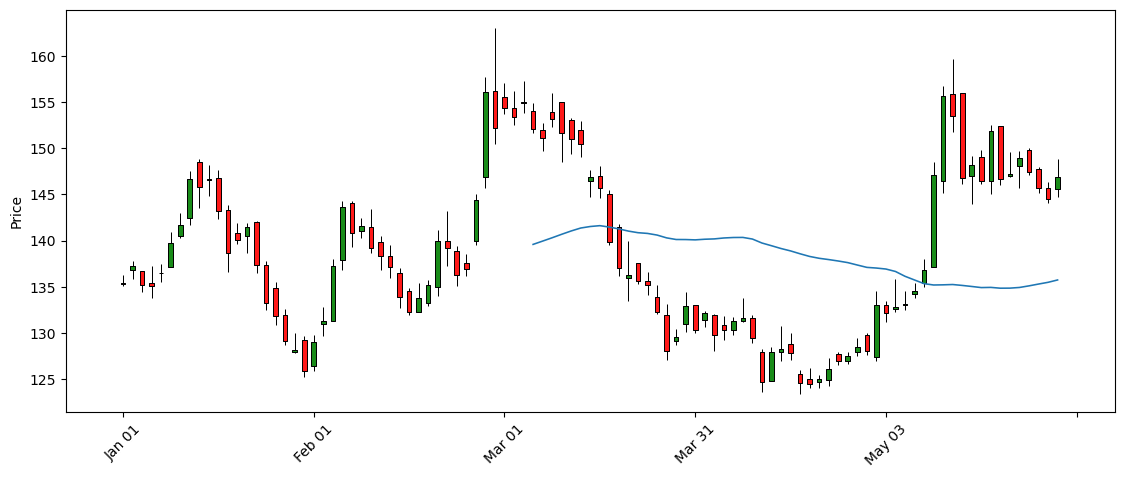

HDFCBANK


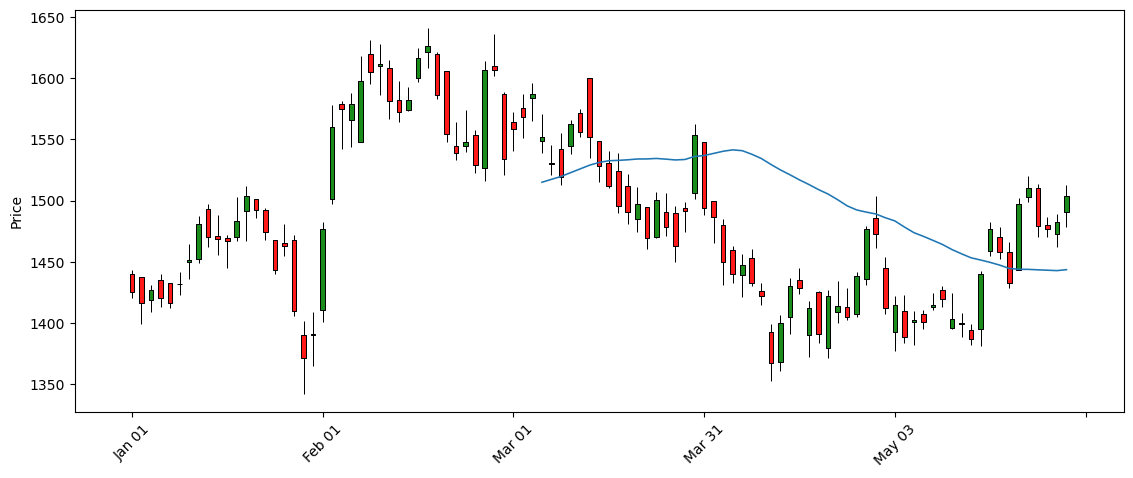

HDFC


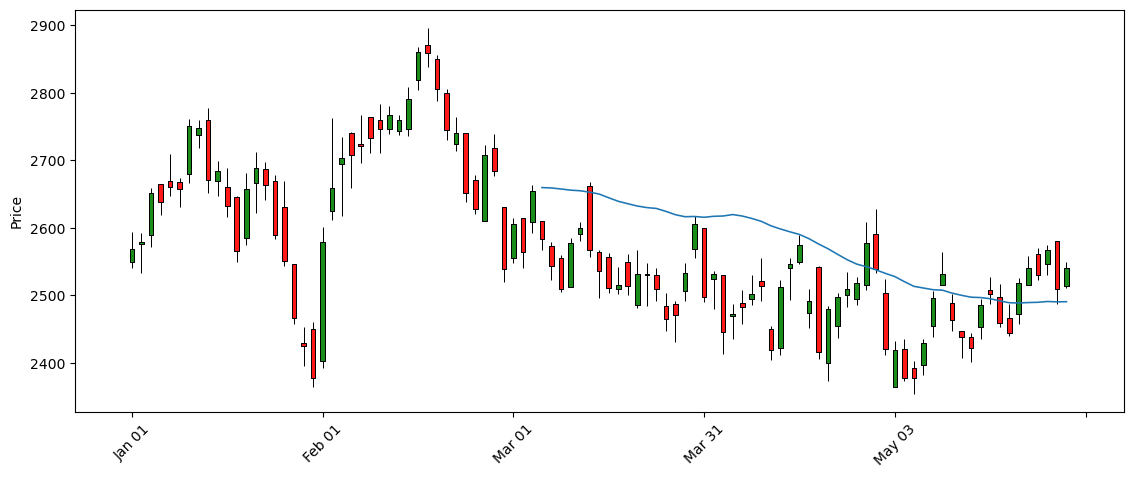

INDUSINDBK


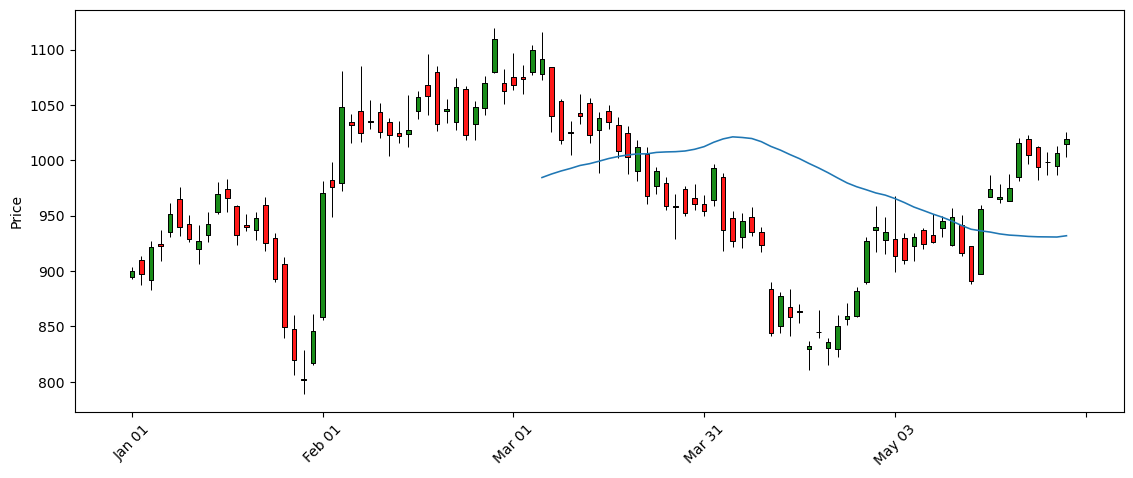

KOTAKBANK


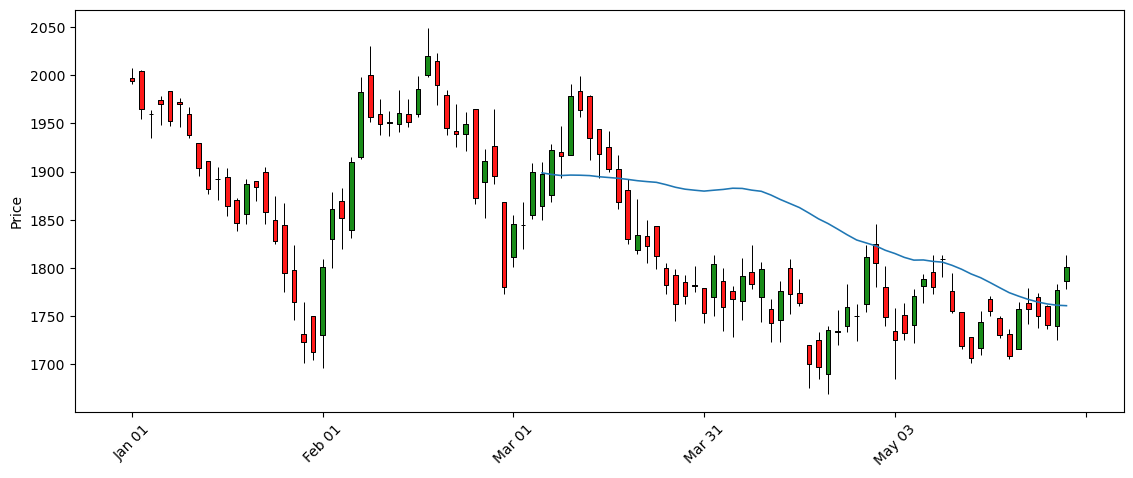

EICHERMOT


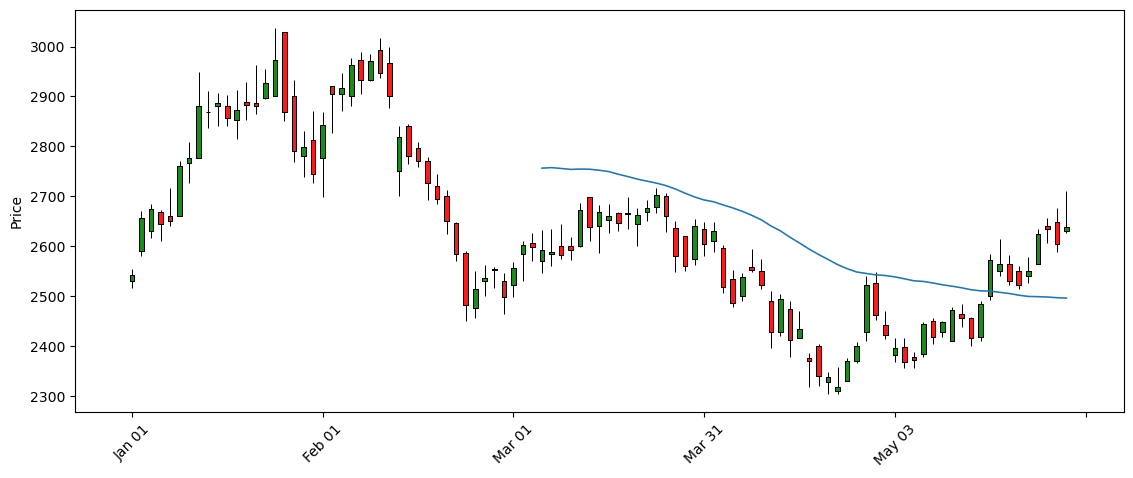

DIVISLAB


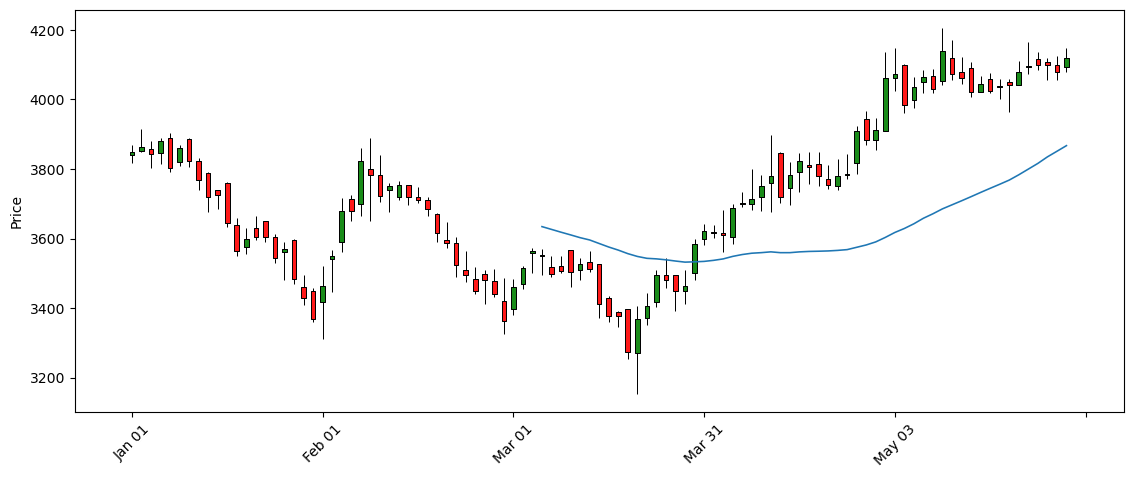

ITC


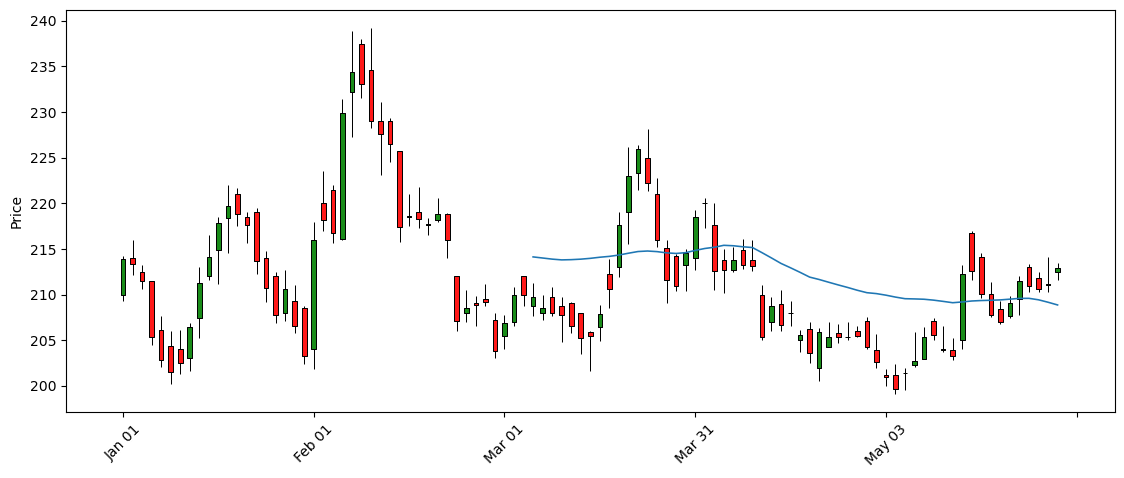

TATACONSUM


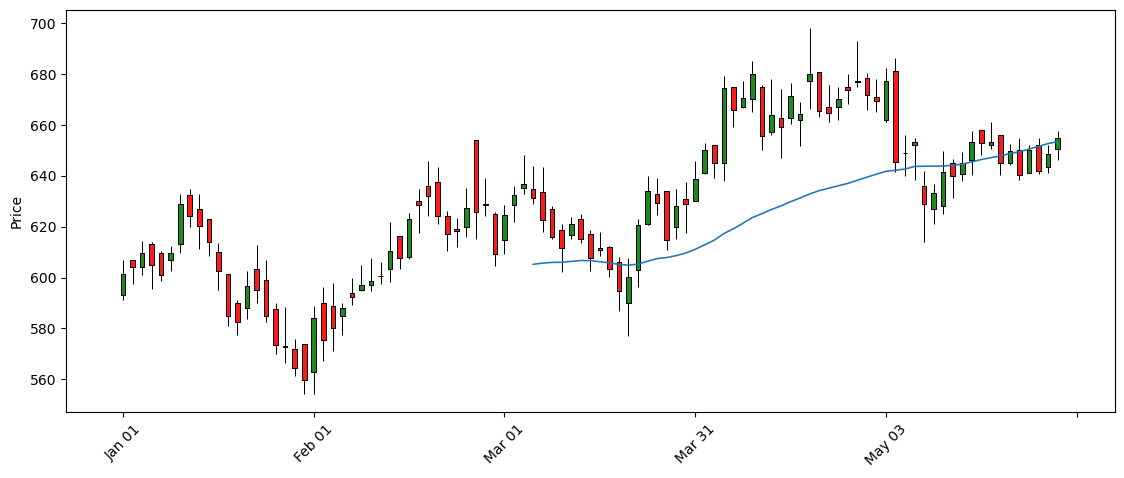

TECHM


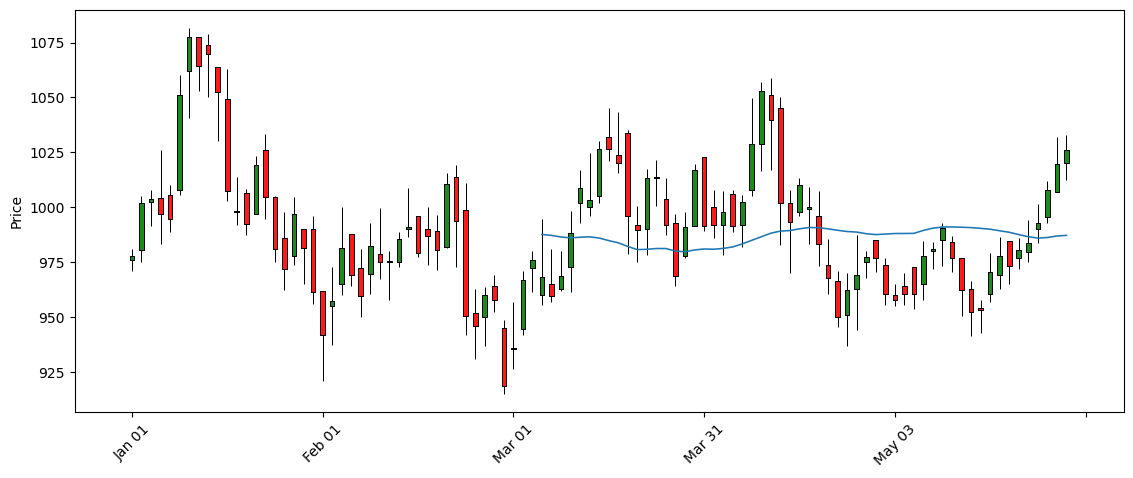

In [283]:
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    if (stock["High"][-1]>= stock["44_obs_for_SMA"][-1] and stock["44_obs_for_SMA"][-1]>= stock["Low"][-1]) or (stock["High"][-1]<= stock["44_obs_for_SMA"][-1] and stock["44_obs_for_SMA"][-1]<= stock["Low"][-1]) or (stock["Low"][-1]+5>=stock["44_obs_for_SMA"][-1]) :
        print(row["SYMBOL"])
        
        mpf.plot(stock,type='candle',figratio=(38,15),mav=44,style=s)